# Project: Investigate The Movie Database (TMDb) Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The Movie Database (TMDb) dataset, originally from Kaggle, was cleaned and provided by Udacity. The dataset contains information about 10,000 movies from 1960 - 2015.
The questions that we will explore over the course of this project:
- **Q1: What are some properties and attributes of the movies from 1960 to 2015?**
 - Movies that makes the highest and lowest profit?
 - Movies with the highest and lowest budget?
 - Movies with highest and lowest revenue?
 - Movies with the longest and shortest runtime?
 - The average movie runtime?
 - The month with the most movies released?
 - The year with the most movies released?
 - The year with the highest profit?
 - Which actors starred in the most movies?
 - Which are the most popular production companies?
 - The most popular genre?
 - The most common keywords?
<br/><br/>
- **Q2: What kind of properties are associated with movies that have  high profit?**
 - High profit movies average runtime?
 - High profit movies average budget?
 - High profit movies average revenue?
 - During which months are movies most profitable?
 - During which years are movies most profitable?
 - High profit movie casts?
 - High profit movie directors?
 - High profit production companies?
 - High profit movie genre?
 - High profit movie keywords?

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import missingno as ms
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_theme()

<a id='wrangling'></a>
## Data Wrangling

> Here we will load the data, check for cleanliness, and trim and clean the dataset for analysis. 

### General Properties to Explore
- Number of samples & columns in the dataset
- Duplicate rows in the dataset
- Datatypes of the columns
- Features with missing values
- Number of unique values for the dataset
- Number of rows with missing values in the dataset
- Descriptive statistics for the dataset
- Number of zero values in ```runtime```, ```budget_adj```, and ```revenue_adj```

In [2]:
# Load the data and perform operations to inspect data types and look for missing or errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>**Observations:** 
>- Columns like ```cast```, ```keywords```, ```genres```, ```production_companies```, contain multiple values separated by "|" character. 
>- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. We will drop the original value and retain the two columns to better compare dollar values between years.
>- The ```vote_count``` is different for all the movies, so we will not be able to calculate the popularity of the movies based on that value.

#### Number of samples & columns in the dataset
Based on the result shown below, there are a total of 10,866 number of movies and 21 columns in the dataset.

In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### Duplicate rows in the dataset
There is only 1 duplicate row which we will drop in the next section.

In [5]:
# Ensure the duplicate row is identical
df[df.duplicated(keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [6]:
# Check for duplicated values
df.duplicated().sum()

1

#### Datatypes
Notice that column such as ```release_date``` are not using the date datatype and ```budget_adj``` and ```revenue_adj``` are float datatypes.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### Features with missing values in the dataset
There are null values in the dataset for these columns: ```imdb_id```, ```cast```, ```homepage```, ```director```, ```tagline```, ```keywords```, ```overview```, ```genres``` and ```production_companies```. Huge number of null values for ```homepage```, ```tagline```, ```keywords``` and ```production_companies``` but since some of them are not necessary for answering the above questions, they will be dropped during data cleaning.

In [8]:
# Check for and visualise missing values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

<AxesSubplot:>

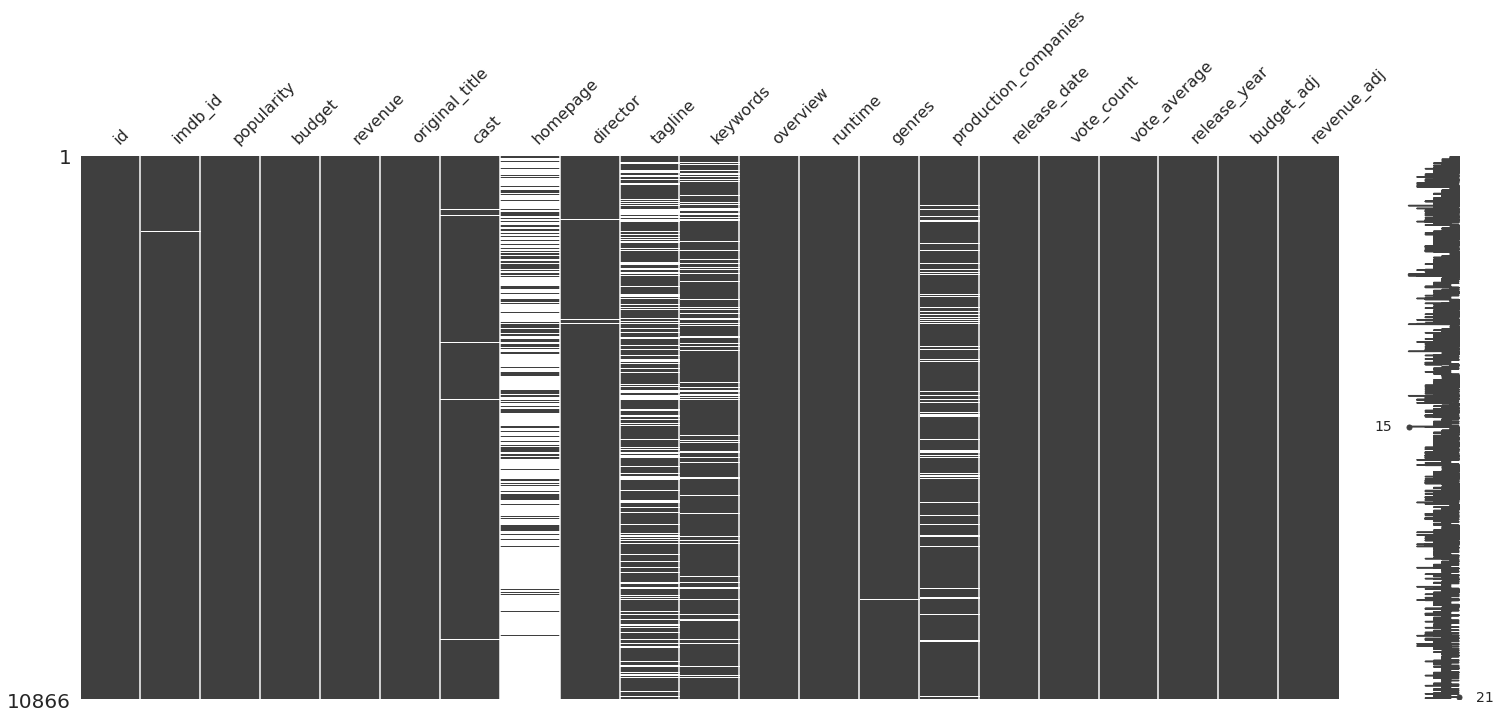

In [9]:
# Visualise the missing values
ms.matrix(df)

In [10]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### Number of unique values for the dataset
To see the total number of unique values for each column.

In [11]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [12]:
# Check total number of rows with at least one column with missing values.
df.isnull().any(axis=1).sum()

8874

#### Number of zero values in ```runtime```, ```budget_adj``` and ```revenue_adj``` 
Getting the total number of zeros in each column will help decide whether to drop the zero values in the dataset.

In [13]:
runtime_zero = (df['runtime'] == 0).sum()
runtime_zero

31

In [14]:
budget_adj_zero = (df['budget_adj'] == 0).sum()
budget_adj_zero

5696

In [15]:
revenue_adj_zero = (df['revenue_adj'] == 0).sum()
revenue_adj_zero

6016

>**Observations:** 
>- There is lots of missing data for ```budget_adj``` and ```revenue_adj```. To avoid dropping  more than 50% of the data, which would affect the statistics and visualisation results, these rows will be retained but replaced with mean values. 
>- The same will be done for the zero values in ```runtime```.

### Data Cleaning
Based on above observations, the following are the cleaning steps to be performed:

1. Drop unecessary columns
2. Drop duplicates
3. Add new column ```profit```
4. Mark zero values with NaN
5. Replace zero values with the mean
6. Convert ``` release_date``` column to Date datatype

#### Drop Extraneous Columns
- ```id```, ```imdb_id```, ```popularity```, ```homepage```, ```overview```, ```tagline```
- ```budget``` and ```revenue``` are being dropped because they are being replaced with the "_adj" columns which show the budget and revenue of the associated movie in terms of 2010 costs, accounting for inflation over time.

In [16]:
# Drop columns from the dataset that aren't related to our questions. This includes budget 
# and revenue, as we'll be using the _adj version of those columns
df.drop(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'homepage', 'overview', 'vote_count', 
               'vote_average', 'tagline'], axis=1, inplace=True)

df.head(1)

,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09


#### Drop the Duplicates

In [17]:
# Drop duplicates in the datasets and confirm dedupe worked, value should return 0
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

#### Add new column ```Profit```

In [18]:
# Insert a new column "Profit" calculated with revenue - budget
df['profit'] = df['revenue_adj'] - df['budget_adj']
df.head(1) 

,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj,profit
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09,1.254446e+09


#### Zero values to NaN

Mark the zero values as NaN and replace them with mean values.

In [19]:
zero_values = ['runtime', 'budget_adj', 'revenue_adj']
df[zero_values] = df[zero_values].replace(0, np.NAN)
df.describe()

,runtime,release_year,budget_adj,revenue_adj,profit
count,10834.000000,10865.000000,5.169000e+03,4.849000e+03,1.086500e+04
mean,102.363855,2001.321859,3.688907e+07,1.151009e+08,3.381911e+07
std,30.948225,12.813260,4.196096e+07,1.988557e+08,1.252194e+08
min,2.000000,1960.000000,9.210911e-01,2.370705e+00,-4.139124e+08
25%,90.000000,1995.000000,8.102293e+06,1.046585e+07,0.000000e+00
50%,99.000000,2006.000000,2.271505e+07,4.395666e+07,0.000000e+00
75%,112.000000,2011.000000,5.008384e+07,1.316482e+08,1.293091e+07
max,900.000000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


#### Replace zero values with mean by imputing them with the mean:

In [20]:
df['runtime'].fillna((df['runtime'].mean()), inplace=True)
df['budget_adj'].fillna((df['budget_adj'].mean()), inplace=True)
df['revenue_adj'].fillna((df['revenue_adj'].mean()), inplace=True)

In [21]:
missing_values = ['runtime', 'budget_adj', 'revenue_adj']
df[missing_values].fillna((df[missing_values].mean()), inplace=True)

/home/x/PycharmProjects/untitled/nano_data/env3/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [22]:
# Confirm the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        10865 non-null  object 
 1   cast                  10789 non-null  object 
 2   director              10821 non-null  object 
 3   keywords              9372 non-null   object 
 4   runtime               10865 non-null  float64
 5   genres                10842 non-null  object 
 6   production_companies  9835 non-null   object 
 7   release_date          10865 non-null  object 
 8   release_year          10865 non-null  int64  
 9   budget_adj            10865 non-null  float64
 10  revenue_adj           10865 non-null  float64
 11  profit                10865 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.1+ MB


#### Convert ``` release_date``` column to Date datatype:

In [23]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.dtypes

original_title                  object
cast                            object
director                        object
keywords                        object
runtime                        float64
genres                          object
production_companies            object
release_date            datetime64[ns]
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
profit                         float64
dtype: object

In [24]:
# Save to new csv to work off of later
df.to_csv('tmdb_movies_cleaned.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

Now that the data is trimmed and cleaned, we can compute on it and create visualisations to address our research questions.

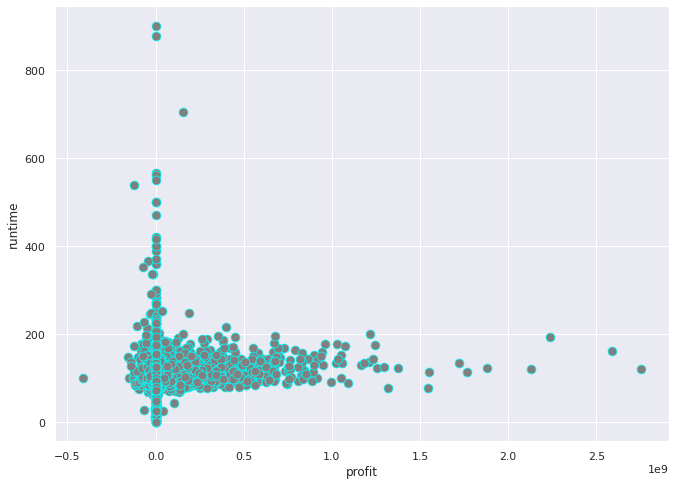

In [25]:
# Describe the correlation between profit vs runtime, budget_adj, revenue_adj
sns.set_theme(palette='crest', 
              font='sans-serif', 
              font_scale=4)
sns.set(rc={'figure.figsize':(11,8)})

sns.scatterplot(data=df,
                x='profit',
                y='runtime',
                color='grey', 
                s=80,
                edgecolor='cyan');

> Based on the above image, there is a strong correlation between ```profit``` and ```runtime```.

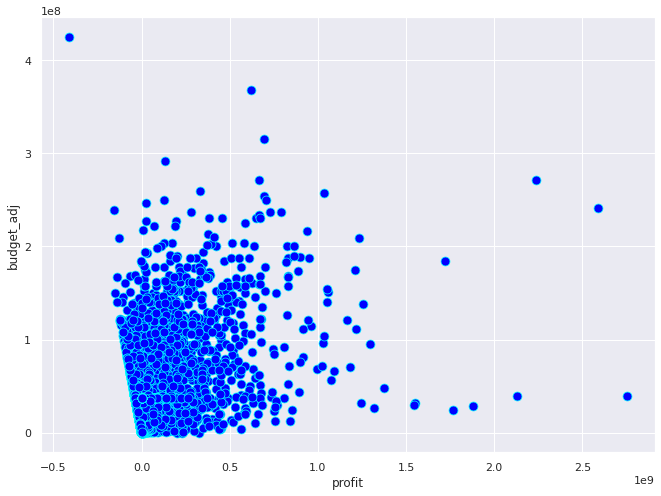

In [26]:
# Correlation between profit and budget_adj
sns.scatterplot(data=df,
                x='profit',
                y='budget_adj',
                color='blue', 
                s=80,
                edgecolor='cyan');

> Based on the above image, there is a strong correlation between ```profit``` and ```budget_adj```.

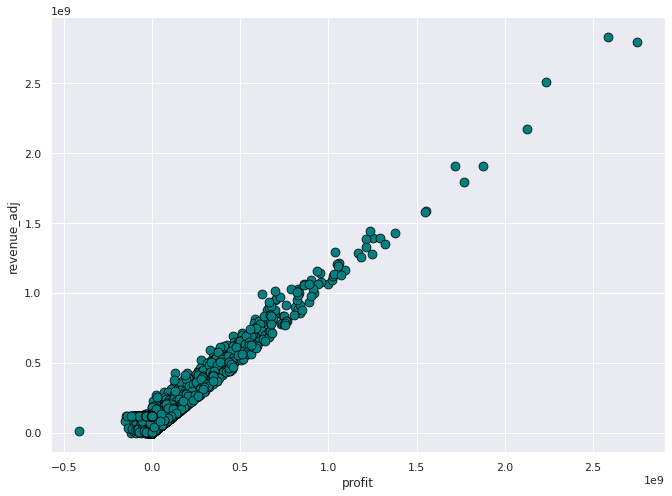

In [27]:
# Correlation between profit and revenue_adj
sns.scatterplot(data=df,
                x='profit',
                y='revenue_adj',
                color='teal', 
                s=80,
                edgecolor='black');

> Based on the above image, there is a strong positive correlation between ```profit``` and ```revenue_adj```.

### Q1: What are the properties and attributes of movies from 1960 - 2015?

#### Movies making the highest and lowest profits?

In [28]:
# Function to calculate highest and lowest values
def highest_lowest_values(column):
    
    # Get highest value
    highest = df[column].idxmax()
    highest_details = pd.DataFrame(df.loc[highest])
    
    # Get lowest value
    lowest = df[column].idxmin()
    lowest_details = pd.DataFrame(df.loc[lowest])  
    
    # Combine the data into one table
    info = pd.concat([highest_details, lowest_details], axis=1)
    
    return info

# Movies that make the highest and lowest profit
highest_lowest_values('profit')

,1329,2244
original_title,Star Wars,The Warrior's Way
cast,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,George Lucas,Sngmoo Lee
keywords,android|galaxy|hermit|death star|lightsaber,assassin|small town|revenge|deception|super speed
runtime,121.0,100.0
genres,Adventure|Action|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Lucasfilm|Twentieth Century Fox Film Corporation,Boram Entertainment Inc.
release_date,1977-03-20 00:00:00,2010-12-02 00:00:00
release_year,1977,2010
budget_adj,39575591.358274,425000000.0


> Based on the table shown above, the movie 'Star Wars' has the highest profit, making more than 2.7 billion dollars while the movie 'The Warrior's Way' had a huge loss of more than 400 million dollars.

#### Movie with the highest and lowest budgets?

In [29]:
highest_lowest_values('budget_adj')

,2244,1151
original_title,The Warrior's Way,Fear Clinic
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Thomas Dekker|Robert Englund|Cleopatra Coleman...
director,Sngmoo Lee,Robert Hall
keywords,assassin|small town|revenge|deception|super speed,phobia|doctor|fear
runtime,100.0,95.0
genres,Adventure|Fantasy|Action|Western|Thriller,Horror
production_companies,Boram Entertainment Inc.,Dry County Films|Anchor Bay Entertainment|Movi...
release_date,2010-12-02 00:00:00,2014-10-31 00:00:00
release_year,2010,2014
budget_adj,425000000.0,0.921091


> 'The Warrior's Way' has the highest budget of more than 400 million dollars. 
'Lost & Found' comes in with the lowest budget at one dollar. This seems unliley and indeed further reasearch  shows that the actual budget of this film is closer to thirty million dollars.

#### Movie with highest and lowest revenue?

In [30]:
highest_lowest_values('revenue_adj')

,1386,5067
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
keywords,culture clash|future|space war|space colony|so...,NaN
runtime,162.0,94.0
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Lions Gate Films|Cruise/Wagner Productions|Bau...
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00
release_year,2009,2003
budget_adj,240886902.887613,7112115.868695


> Based on this tablee, 'Avatar' has the highest revenue, earning more than 2.8 billion dollars, while the film 'Shattered Glass' earned only 2 dollars. This seemed unlikely and a search showed that the movie earned closer to 2.9 million dollars.

#### Movie with the longest and shortest runtimes?

In [31]:
highest_lowest_values('runtime')

,3894,4883
original_title,The Story of Film: An Odyssey,Fresh Guacamole
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,NaN
director,Mark Cousins,PES
keywords,cinema|nouvelle vague|hindi cinema|cinema novo...,NaN
runtime,900.0,2.0
genres,Documentary,Animation
production_companies,NaN,NaN
release_date,2011-09-03 00:00:00,2012-03-02 00:00:00
release_year,2011,2012
budget_adj,36889069.204002,36889069.204002


>- 'The Story of Film: An Odyssey' is the longest film totalling about 15 hours.
>- 'Fresh Guacamole' has the shortest runtime at 2 minutes.

#### The average movie runtime?

In [32]:
df['runtime'].mean()

102.36385453202878

#### Visualising the distribution of the runtime:

/home/x/PycharmProjects/untitled/nano_data/env3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density of Movie Count')

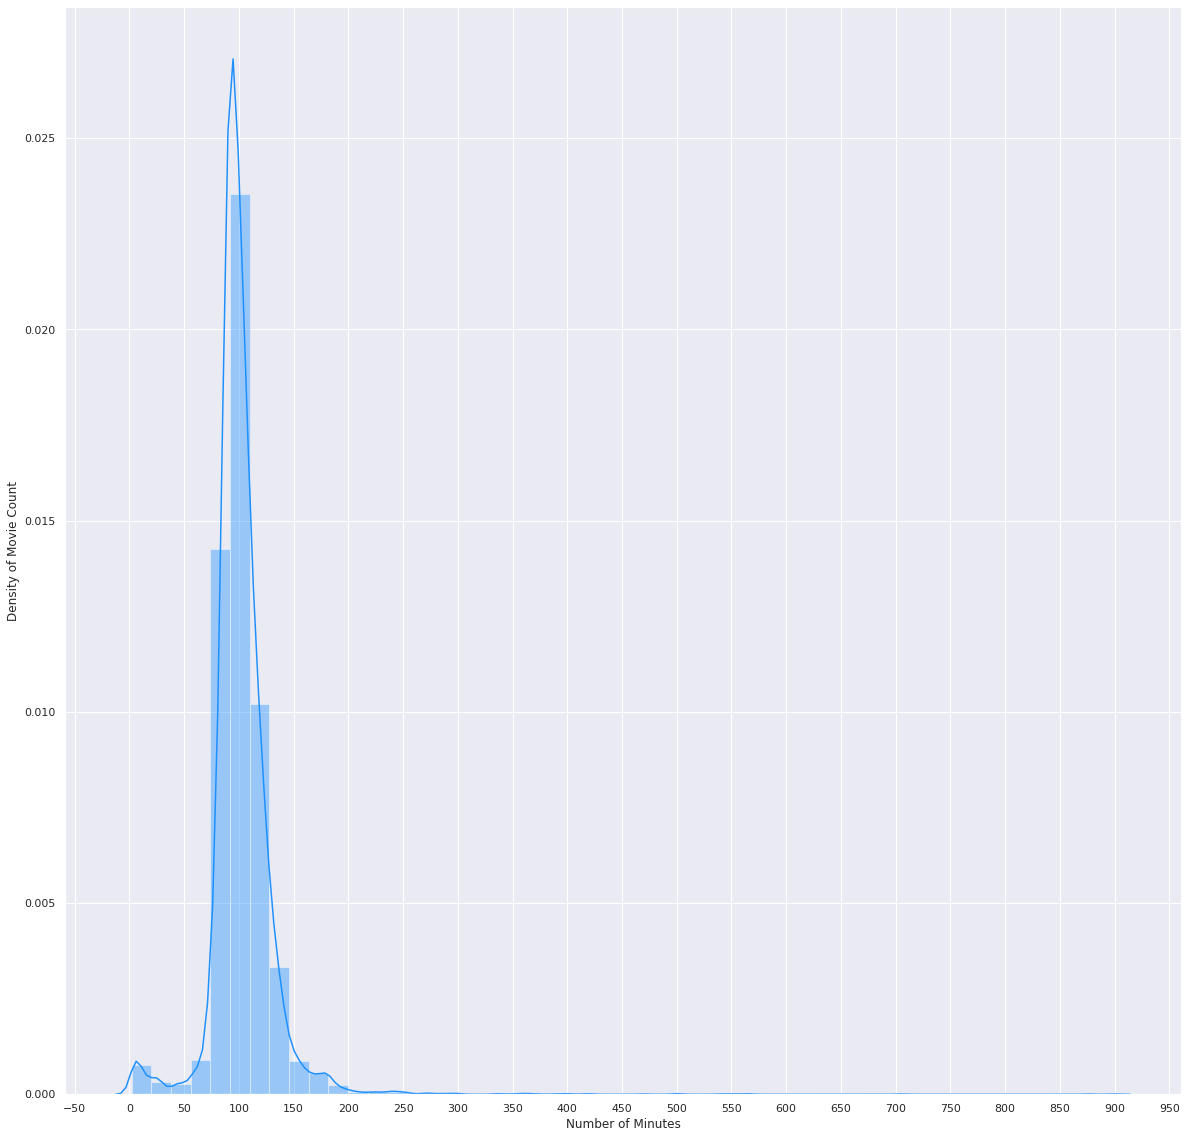

In [65]:
# Create distplot plot to see distribution of runtime 
fig, ax = plt.subplots(1,1)
sns.distplot(df['runtime'], kde=True, color='dodgerblue')
sns.set(rc={'figure.figsize':(20,10)})
tick_spacing = 50
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlabel('Number of Minutes') 
plt.ylabel('Density of Movie Count') 

> We can see from this that most of the movies have an average runtime of 100 minutes, though there are a number of outliers.

In [34]:
df['runtime'].describe()

count    10865.000000
mean       102.363855
std         30.904039
min          2.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

> The analysis above shows:
>- 25th percentile of movies have a runtime of 90 minutes.
>- 50th percentile of movies have a runtime of 99 minutes.
>- 75th percentile of movies have a runtime of 111 minutes.
>- Average movie runtime is 102 minutes.
>- The longest movie is 'The Story of Film: An Odyssey' with a runtime of 900 minutes.
>- The shortest movie is 'Fresh Guacamole' with a runtime of 2 minutes.

#### The month with the most movies released?

In [35]:
# Create a new column month by extracting the month from the release date
df['month'] = df['release_date'].apply(lambda x: x.month)

In [36]:
# Group by month and monthly movie count
movie_per_month = df.groupby('month')['original_title'].count()
movie_per_month

month
1      919
2      691
3      822
4      797
5      809
6      827
7      799
8      918
9     1331
10    1153
11     814
12     985
Name: original_title, dtype: int64

In [37]:
# Month with the highest movie release
movie_per_month.idxmax()

9

> The month with the highest movie releases is September.

Text(0.5, 1.0, 'Number of Movies Released Per Month')

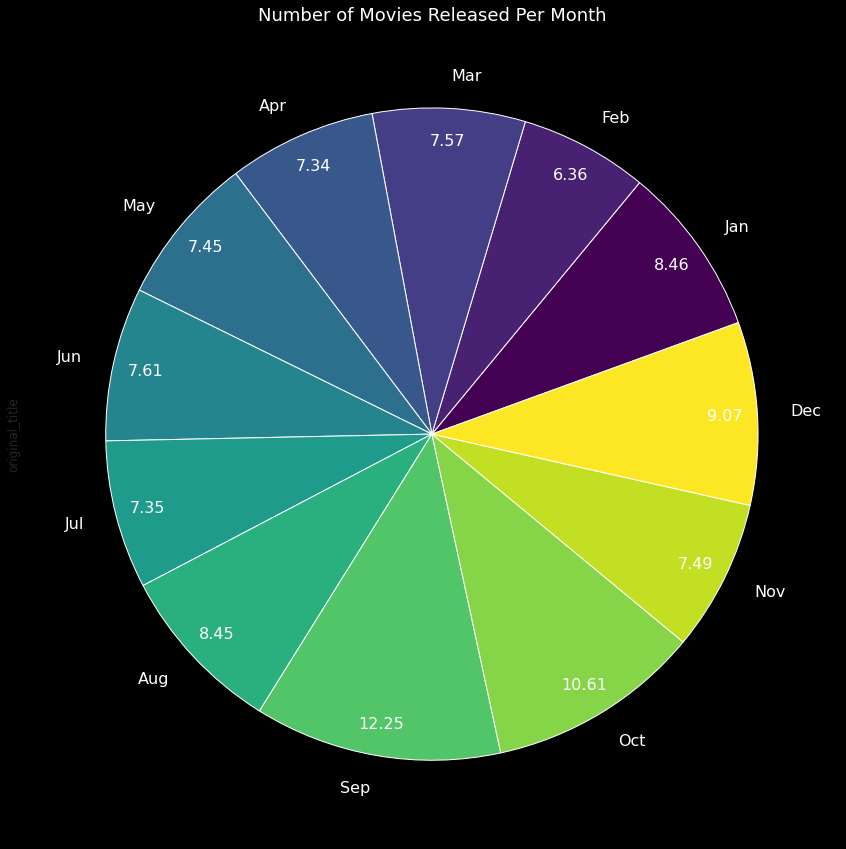

In [38]:
# Create a pie chart
plt.rcParams.update({'font.fantasy': 'Chicago'})
plt.rcParams.update({'text.color': 'white'})
plt.rcParams.update({'figure.facecolor': 'black'})

month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
                    
movie_per_month.plot(kind='pie', 
                    figsize=(20, 15), 
                    cmap='viridis',
                    autopct='%.2f',
                    startangle=20,
                    labeldistance=1.1,
                    textprops={'fontsize': 16},
                    labels=month_name,
                    pctdistance=0.9)   

plt.title('Number of Movies Released Per Month', fontsize=18)

>From this analysis, we can see that September (12.25% of the total movie count) is the most popular month for movie releases, followed by October (10.61% of the total movie count) and December (9.07% of the total movie count).

#### The year with the most movies released?

In [39]:
movie_per_year = df.groupby('release_year')['original_title'].count()
movie_per_year.idxmax()

2014

>The year with the most movies released is 2014.

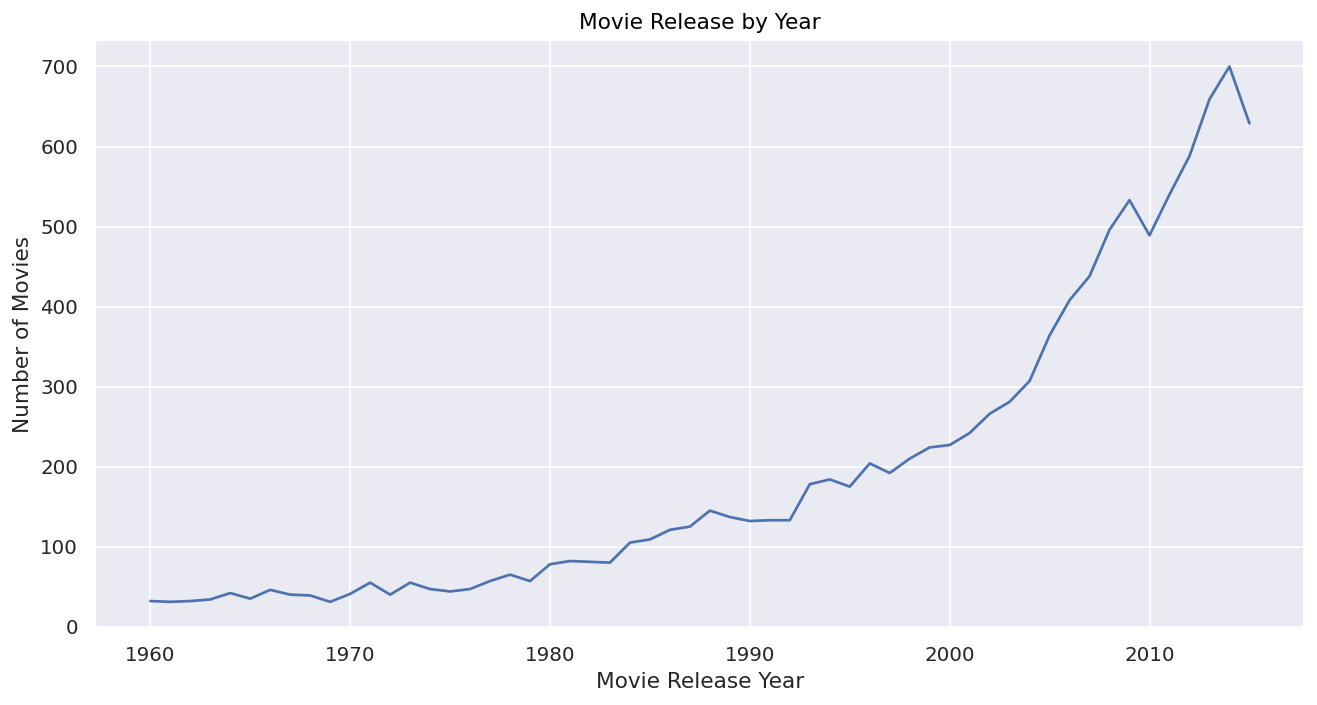

In [66]:
# Figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)
plt.rcParams.update({'font.fantasy': 'Chicago'})
plt.rcParams.update({'text.color': 'black'})
plt.rcParams.update({'figure.facecolor': 'white'})

# x-axis
plt.xlabel('Movie Release Year', fontsize = 12)
# y-axis
plt.ylabel('Number of Movies', fontsize = 12)
# Title
plt.title('Movie Release by Year')

# Plot Line chart
plt.plot(movie_per_year)

> The above diagram shows that the trend of movies released each year in increasing annually. We observe two significant drops, one during the late 2000s to 2010 and the other around 2015.

In [41]:
# Group by year and count of the movies each year.
movie_per_year = df.groupby('release_year')['original_title'].count()
movie_per_year.tail(10)

release_year
2006    408
2007    438
2008    496
2009    533
2010    489
2011    540
2012    588
2013    659
2014    700
2015    629
Name: original_title, dtype: int64

>By looking at the last 10 rows from the movies by release year, we can see that the significant drops are: 
>- **2009**: a drop of 44 movies from 2009 (533 movies) to 2010 (489 movies).
>- **2015**: a drop of 71 movies from 2014 (700 movies) to 2015 (629 movies).

#### Year with the most profit?

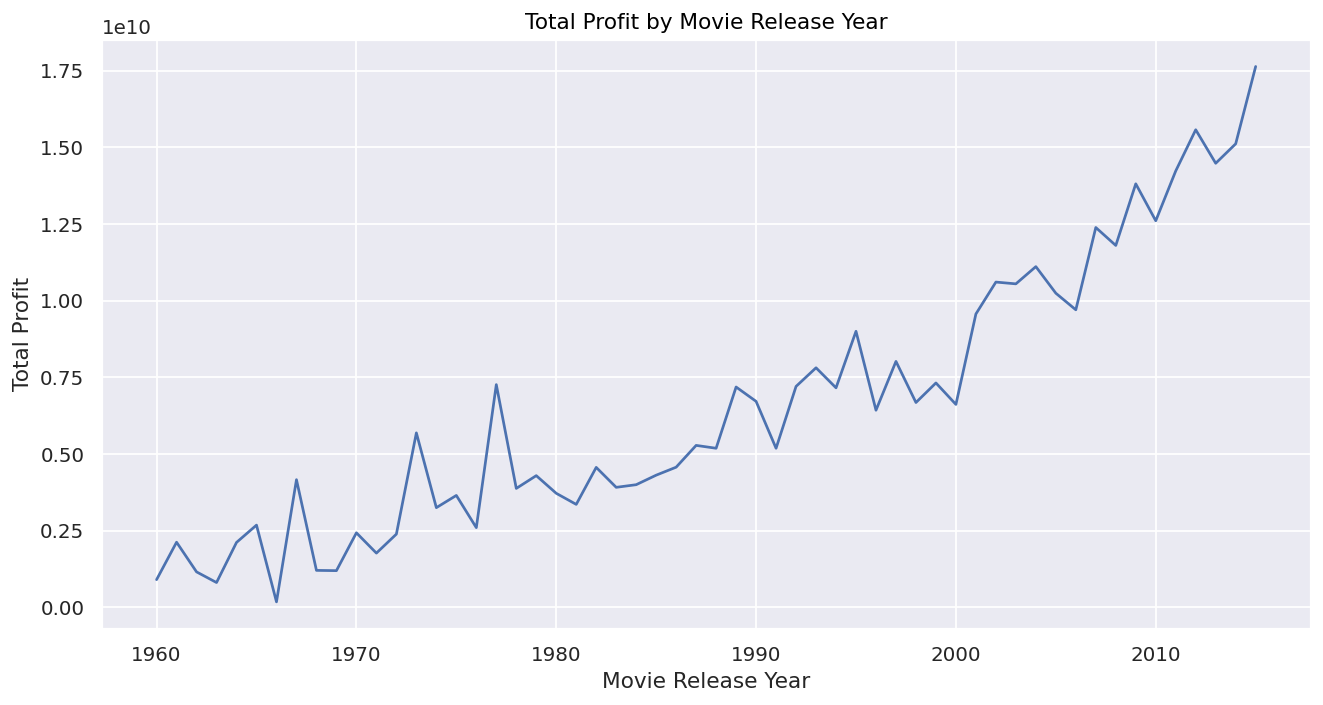

In [42]:
# Groupby release year and profit
profit_by_year = df.groupby('release_year')['profit'].sum()

# Figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

# x-axis
plt.xlabel('Movie Release Year', fontsize=12)
# y-axis
plt.ylabel('Total Profit', fontsize=12)
# title
plt.title('Total Profit by Movie Release Year')

# plot line chart
plt.plot(profit_by_year)

In [43]:
# Which year had the highest profit?
profit_by_year.idxmax()

2015

In [44]:
profit_by_year.head()

release_year
1960    9.064920e+08
1961    2.127059e+09
1962    1.159535e+09
1963    8.122237e+08
1964    2.119616e+09
Name: profit, dtype: float64

>As shown above, the movies released in 2015 have the highest profits totalling more than 17 billion dollars.

Text(0.5, 1.0, 'Total Profits by Movie Release Year')

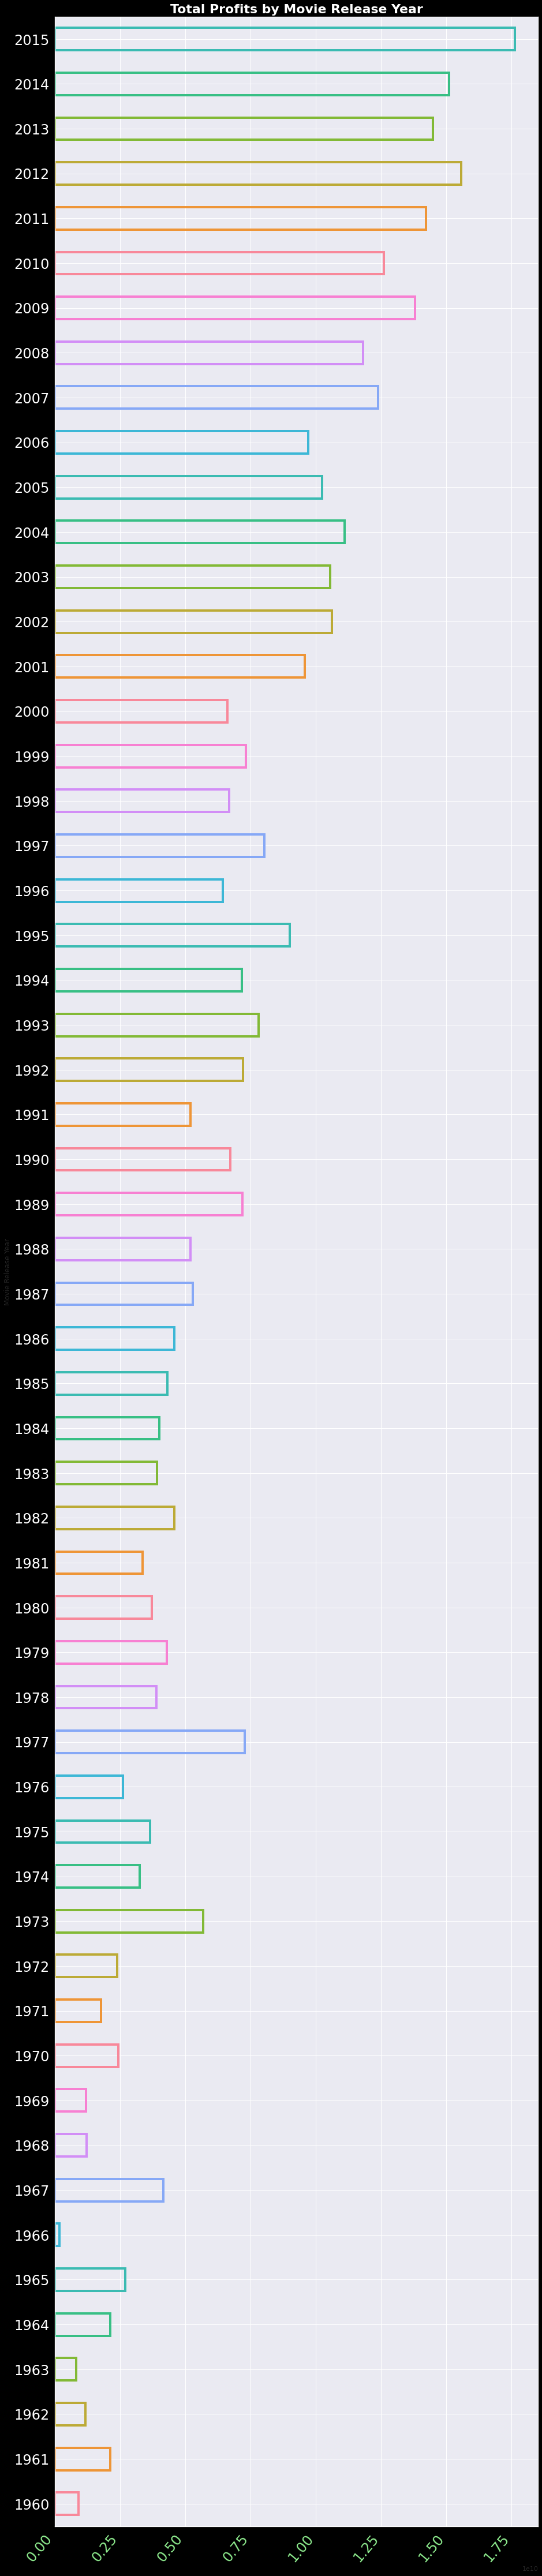

In [45]:
# By way of visual comparison, we plot the same question as above in a different style
plt.rcParams.update({'font.monospace': 'Terminal'})
plt.rcParams.update({'figure.facecolor': 'black'})
plt.rcParams.update({'text.color': 'white'})
plt.rcParams.update({'axes.grid': True})
plt.yticks(ha='right', color='white')
plt.xticks(rotation=50, ha='right', color='lightgreen', size='large')
profit_by_year = df.groupby('release_year')['profit'].sum()

# Which year makes the most profit?
profit_by_year.plot(kind='barh', 
                    figsize=(15,80), 
                    facecolor=(0, 0, 0, 0),  # make bar transparent
                    linewidth=4, 
                    ec=sns.husl_palette(10, l=.7),  # edgecolour
                    fontsize=24,
                    y=profit_by_year,
                    xlabel='Movie Release Year')

plt.title('Total Profits by Movie Release Year', fontsize=22, fontweight='bold')

#### Which actor starred in the most movies?

In [46]:
def get_column_data(column_name):

    data = df[column_name].str.cat(sep = '|')
    
    # Create pandas series and store the values separately
    data = pd.Series(data.split('|'))
    
    # Display value count in descending order
    count = data.value_counts(ascending=False)
    
    return count

# "Top 20" cast
cast = get_column_data('cast')
cast.head(20)

Robert De Niro        72
Samuel L. Jackson     71
Bruce Willis          62
Nicolas Cage          61
Michael Caine         53
Robin Williams        51
John Cusack           50
John Goodman          49
Morgan Freeman        49
Liam Neeson           48
Susan Sarandon        48
Julianne Moore        47
Alec Baldwin          47
Tom Hanks             46
Gene Hackman          46
Johnny Depp           46
Christopher Walken    46
Dennis Quaid          45
Sylvester Stallone    45
Willem Dafoe          45
dtype: int64

#### The most popular production companies?

In [47]:
production_companies = get_column_data('production_companies')
production_companies.head(10)

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
New Line Cinema                           219
Metro-Goldwyn-Mayer (MGM)                 218
Walt Disney Pictures                      214
Touchstone Pictures                       178
Columbia Pictures Corporation             160
dtype: int64

#### The most popular genres?

In [48]:
genres = get_column_data('genres')
genres.head(10)

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
dtype: int64

>The top two genres are Drama (4,760 movies) and Comedy (3,793 movies).

#### The most common keywords?

In [49]:
keywords = get_column_data('keywords')
keywords.head(20)

woman director          413
independent film        396
based on novel          278
sex                     272
sport                   216
murder                  204
biography               169
musical                 169
new york                163
suspense                159
nudity                  154
duringcreditsstinger    152
female nudity           149
prison                  140
revenge                 137
dystopia                136
high school             135
sequel                  130
london                  123
suicide                 115
dtype: int64

>The top keywords are 'woman director' and 'independent film' with more than 390 movies each.

### Research Question 2 - What kind of properties are associated with movies that have high profits?

To analyse on the properties that are associated with higher profit movies, we will have to filter the dataset on movies with profits >= 100 million dollars.

In [50]:
high_profit_movie = df[df['profit'] >= 100000000]

high_profit_movie.head()

,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj,profit,month
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,1.379999e+08,1.392446e+09,1.254446e+09,6
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015,1.379999e+08,3.481613e+08,2.101614e+08,5
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015,1.012000e+08,2.716190e+08,1.704191e+08,3
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015,1.839999e+08,1.902723e+09,1.718723e+09,12
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015,1.747999e+08,1.385749e+09,1.210949e+09,4


In [51]:
high_profit_movie.describe()

,runtime,release_year,budget_adj,revenue_adj,profit,month
count,1089.000000,1089.000000,1.089000e+03,1.089000e+03,1.089000e+03,1089.000000
mean,115.955923,1998.367309,7.353762e+07,3.715738e+08,3.005429e+08,7.463728
std,28.492322,13.089591,5.536918e+07,2.909409e+08,2.682571e+08,3.256613
min,44.000000,1960.000000,2.248029e+02,1.000516e+08,1.000516e+08,1.000000
25%,99.000000,1991.000000,3.389464e+07,1.903475e+08,1.381282e+08,5.000000
50%,113.000000,2001.000000,5.793440e+07,2.746954e+08,2.073424e+08,7.000000
75%,127.000000,2009.000000,1.047242e+08,4.460595e+08,3.616719e+08,11.000000
max,705.000000,2015.000000,3.683713e+08,2.827124e+09,2.750137e+09,12.000000


>  The highest earning movie brought in 2.75 billion dollars. Our earlier analysis showed that this movie is 'Star Wars'.

#### Average runtime for high revenue movies?

In [52]:
round(high_profit_movie['runtime'].mean(), 2)

115.96

>Based on the above, the average runtime for high revenue movies is 116 minutes.

In [53]:
# Group by year and count of the movies each month.
high_profit_movie_per_month = high_profit_movie.groupby('month')['original_title'].count()
high_profit_movie_per_month

month
1      27
2      52
3      72
4      52
5     118
6     159
7     112
8      62
9      64
10     84
11    111
12    176
Name: original_title, dtype: int64

#### Average budget for high profit movies?

In [54]:
high_profit_movie['budget_adj'].mean()

73537621.57359678

>The average budget for high profit movies is $73,537,622.

#### Average revenue for high profit movies?

In [55]:
round(high_profit_movie['revenue_adj'].mean(), 2)

371573840.35

>The average revenue for high profit movies is $371,573,840.

#### Month with the highest profit?

In [56]:
# Group by year and count each month
high_profit_movie_per_month = high_profit_movie.groupby('month')['original_title'].count()
high_profit_movie_per_month

month
1      27
2      52
3      72
4      52
5     118
6     159
7     112
8      62
9      64
10     84
11    111
12    176
Name: original_title, dtype: int64

In [57]:
high_profit_movie_per_month.idxmax()

12

> The month with the highest movie profit is December.

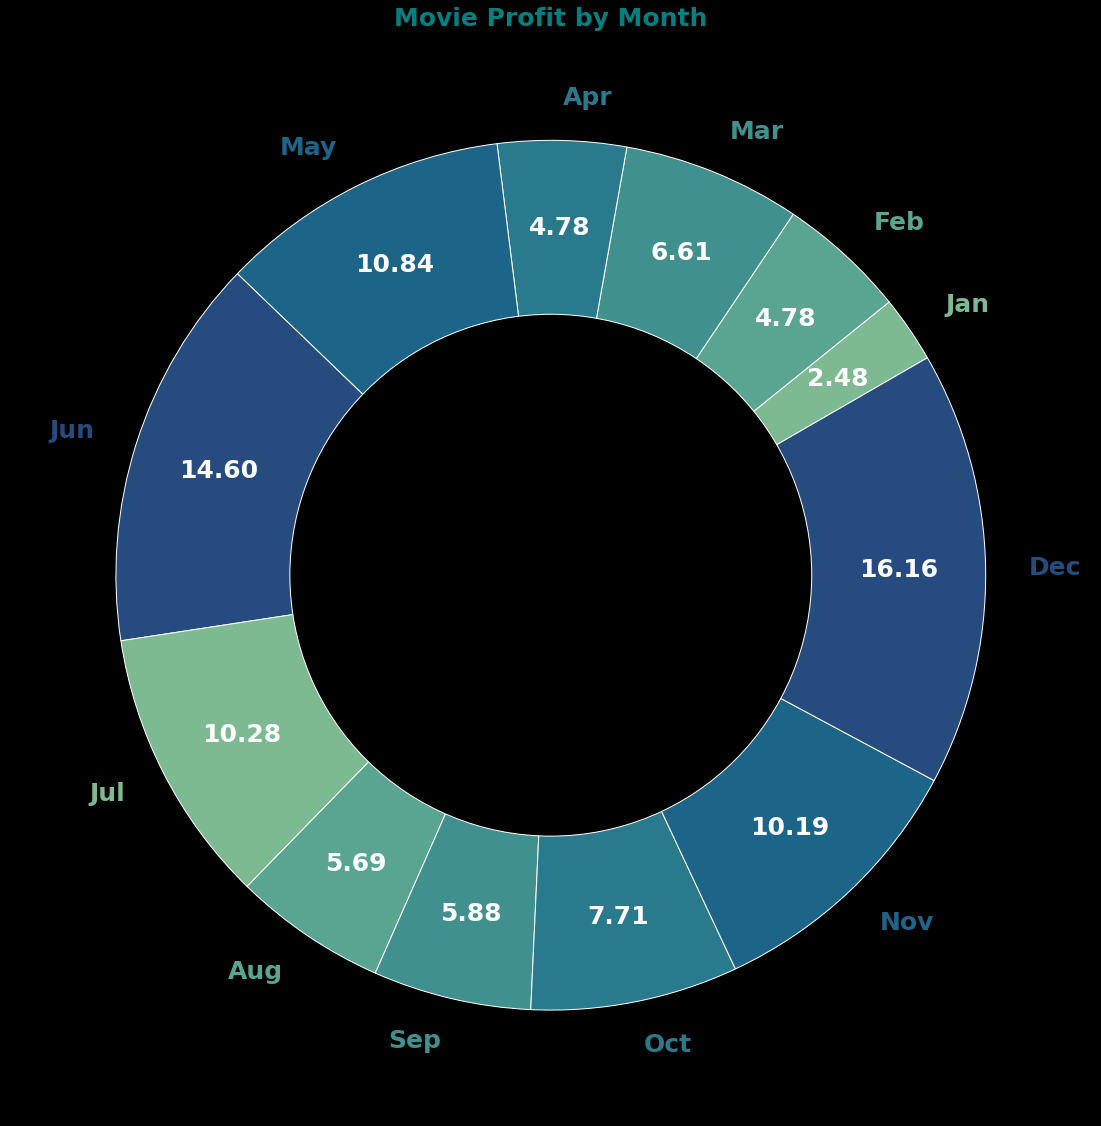

In [58]:
# Create a pie chart
plt.rcParams.update({'font.fantasy': 'Chicago'})
plt.rcParams.update({'text.color': 'white'})
plt.rcParams.update({'figure.facecolor': 'black'})
plt.rcParams.update({'figure.figsize': (20,20)})

font_size = 25
colors = sns.color_palette('crest') 
autopct = '%.2f'
labeldistance = 1.1
pctdistance = 0.8
startangle = 30
labels = month_name
sizes = high_profit_movie_per_month    

fig, ax = plt.subplots()

# Capture outputs of axis 'ax'
wedges, texts, pcts = ax.pie(sizes,
                              colors=colors, 
                              labels=labels, 
                              autopct=autopct,
                              labeldistance=labeldistance,
                              pctdistance=pctdistance,
                              startangle=startangle)

# Set exterior label colour to match its wedge
for i, wedge in enumerate(wedges):
    texts[i].set_color(wedge.get_facecolor())

plt.setp(texts, fontweight=800, fontsize=font_size)
plt.setp(pcts, color='white', fontsize=font_size, fontweight='bold')
plt.title('Movie Profit by Month', fontsize=font_size, color='teal', fontweight='bold')

# Draw circle
centre_circle = plt.Circle((0,0), 0.60, fc='black')
fig = plt.gcf()
fig.gca().add_artist(centre_circle);

>This analysis shows that December is the month with the highest profit movie releases, followed by June and May.

#### High revenue movie cast?

In [59]:
def extract_high_profit_data(column_name):

    data = high_profit_movie[column_name].str.cat(sep = '|')
    
    # Create pandas series and store the values separately
    data = pd.Series(data.split('|'))
    
    # Display value count in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [60]:
# "Top 20" cast
cast = extract_high_profit_data('cast')
cast.head(20)

Tom Cruise               27
Tom Hanks                22
Brad Pitt                18
Sylvester Stallone       18
Eddie Murphy             17
Adam Sandler             17
Cameron Diaz             17
Harrison Ford            17
Jim Carrey               16
Bruce Willis             16
Robert De Niro           16
Arnold Schwarzenegger    15
Robin Williams           15
Will Smith               15
Liam Neeson              14
Dustin Hoffman           14
Julia Roberts            14
Clint Eastwood           14
Ralph Fiennes            14
Sean Connery             14
dtype: int64

> The top two male actors with more than 20 movies are Tom Cruise (27 movies) and Tom Hanks (22 movies). The top two female actresses are Cameron Diaz (17 movies) and Julia Roberts (14 movies). Only 2/20 of these actors are female. 

#### High profit movie directors?

In [61]:
director = extract_high_profit_data('director')
director.head(20)

Steven Spielberg      22
Robert Zemeckis       12
Ron Howard            11
Clint Eastwood         9
Michael Bay            8
Tim Burton             8
Ridley Scott           8
Roland Emmerich        7
Ivan Reitman           7
Peter Jackson          7
David Fincher          7
M. Night Shyamalan     7
Quentin Tarantino      7
Chris Columbus         7
Gore Verbinski         7
Richard Donner         7
Carlos Saldanha        6
David Zucker           6
Martin Scorsese        6
Sydney Pollack         6
dtype: int64

> Steven Spielberg is the top director making the most high profit movies between 1960 to 2015. Interestingly, although Woody Allen has directed so many movies, he is not in the top 20 list when it comes to profit.

#### High profit genres?

In [62]:
director = extract_high_profit_data('genres')
director.head(10)

Comedy             402
Drama              395
Action             394
Adventure          337
Thriller           310
Family             194
Science Fiction    178
Romance            178
Crime              166
Fantasy            165
dtype: int64

#### High profit movie keywords?

In [63]:
keywords = extract_high_profit_data('keywords')
keywords.head(10)

based on novel          56
dystopia                33
duringcreditsstinger    31
london                  30
saving the world        27
sequel                  26
musical                 24
prison                  23
new york                22
marvel comic            21
dtype: int64

>We have a different result set here compared with the previous top ten keywords. The top movie keywords for high profits goes to 'based on novel' followed by 'dystopia', 'duringcreditsstinger' and 'london'. 

<a id='conclusions'></a>
## Conclusions

> The goal of this data analysis was to answer two main questions:
>- 1. Properties and attributes of movies from 1960 - 2015. 
>- 2. Properties that are associated with movies with a high profit of at least 100 million dollars.

#### Properties and attributes of movies from 1960 - 2015:
>- Average movie runtime: 102 minutes
>- Month with the most movies released: September
>- Year with the most movies released: 2014
>- Year with the highest revenue: 2015
>- Actors starring in the most movies: Robert De Niro, Samuel L. Jackson, Bruce Willis
>- Directors with the most movies: Woody Allen, Clint Eastwood, Martin Scorsese
>- Top three production companies: Universal Pictures, Warner Bros., Paramount Pictures
>- Most popular genres: Drama, Comedy, Thriller
>- Most common keywords: woman director, independent film, based on novel


#### Properties and attributes of movies with a profit of at least 100 million dollars: 
>- Average budget: ~74 million dollars
>- Average runtime: 116 minutes
>- Ideal month to release movie: December or June
>- Actors to cast: Tom Cruise, Tom Hanks, Brad Pitt
>- Actresses to cast:  Cameron Diaz, Julia Roberts
>- Top directors:  Steven Spielberg, Robert Zemeckis, Ron Howard
>- Good choices for production companies: Universal Pictures, Warner Bros., Paramount Pictures
>- Good choices for genres: Comedy, Drama, Action
>- Good choices for movie plot: based on a novel, dystopian environment, set in London, have a post-credits scene.
<br/><br/>
> Any movie that meets the above criteria should have a higher probability of being a high profit film, earning a profit of at least 100 million dollars.
<br/><br/>
Note: The above analysis was computed on  movies from 1960 - 2015 and with a profit of at least 100 million dollars, so there are of course movies which exist but were not examined by this analysis. As well, we encountred lots of missing data and data that was factually incorrect.